Importing the dependencies


In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data collection and Processing

In [116]:
loan_dataset = pd.read_csv('https://raw.githubusercontent.com/bobby6007/loan_prediction/main/loan_prediction_data.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
loan_dataset.shape


(614, 13)

In [118]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [119]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [120]:
# Analayzing missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [122]:
# checking for missing values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [123]:
# new shape of our dataset
loan_dataset.shape


(480, 13)

In [124]:
loan_dataset['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [125]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [126]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

Data Visualization

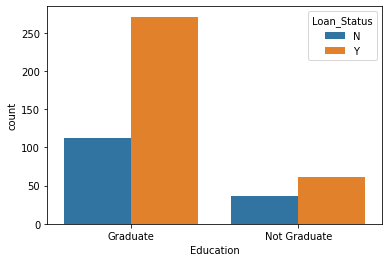

In [127]:
# visualizing education and loan status correlation
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

It can be seen that applicants for loan with degrees have had higher chances of getting the loan compared to those who do not hold any degree

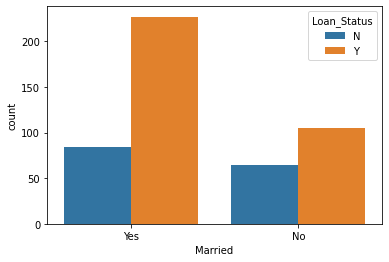

In [128]:
# correlation between marital status and Loan_Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

From the the plot we can conclude that applicants that are married were granted loan compared to those who do not have a marriage

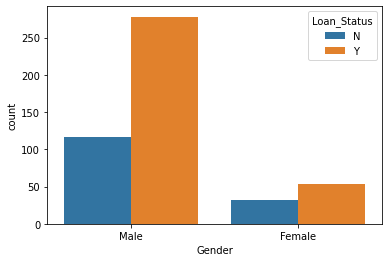

In [129]:
# Correlation of granting loan in relation to Gender of applicants
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

From the plot, it can be derived that males had a higher chance of obtaining loan compared to females

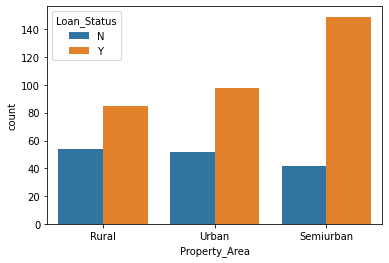

In [130]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_dataset)

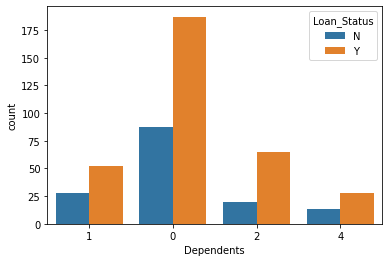

In [131]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

The plot demonstrates that applicants with no dependents were granted loan more than compared to applicants with dependents

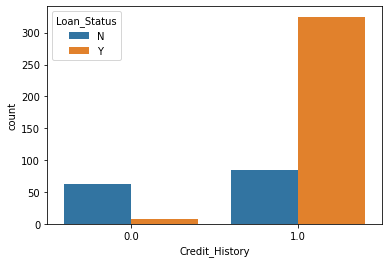

In [132]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_dataset)

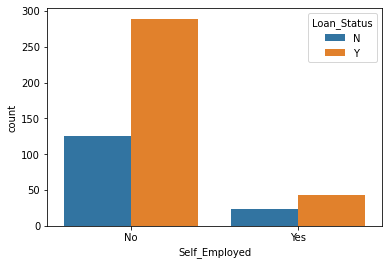

In [133]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

The loan givers in most cases considered that self_employed applicants might carry some risks resulting them not be able to payback the loan, therefore they were not granted loan in most cases

# Preprocessing the dataset

Encoding categorical labels to numerical values:




In [134]:
loan_dataset['Education'].value_counts()


Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [135]:
loan_dataset['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [136]:
loan_dataset['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [137]:
loan_dataset['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [138]:
loan_dataset['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [139]:
loan_dataset['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

We will encode our dependent variable(output variable)  

In [140]:
# encoding our Loan_Status label to numerical values for ML 'NO' as 0, 'YES' as 1
loan_dataset.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

As for independent variables, we do the same process

In [141]:
loan_dataset.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':1, 'Female':0},'Self_Employed':{'No':0, 'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Separating dependent variable and independent variables

In [142]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status'].copy()

In [143]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Splitting the dataset into train and test data


In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=42)

In [145]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model using Support Vector Machine

In [146]:
classifier = svm.SVC(kernel='linear')

In [147]:
# training the support Vector Machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [148]:
# Accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accruacy = accuracy_score(X_train_prediction, Y_train)

In [149]:
print('Accuracy Score on training data : ',training_data_accruacy)

Accuracy Score on training data :  0.8032407407407407


In [150]:
# Accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accruacy = accuracy_score(X_test_prediction, Y_test)

In [151]:
print('Accuracy Score on test data : ',test_data_accruacy)

Accuracy Score on test data :  0.7916666666666666
